In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\ouykh\Downloads\BTCUSD.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-04,37475.105469,38592.175781,36317.500000,36926.066406,36926.066406,68838074392
1,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
2,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
3,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
4,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687


In [3]:
data.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)

In [6]:
data.index = pd.to_datetime(data.Date)

In [7]:
data.describe()

,Close
count,366.000000
mean,47973.606942
std,9220.474605
min,29807.347656
25%,40265.424805
50%,47747.423828
75%,56187.017578
max,67566.828125


C:\Users\ouykh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

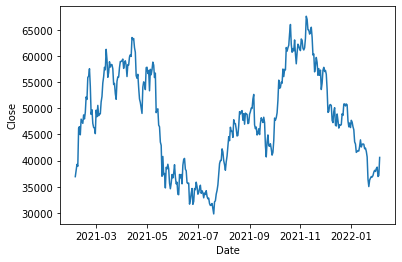

In [8]:
sns.lineplot(data.Date, data.Close)

In [9]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [10]:
result = adfuller(data['Close'])
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -2.04
5% Critical Value: -2.87
p-value: 0.27


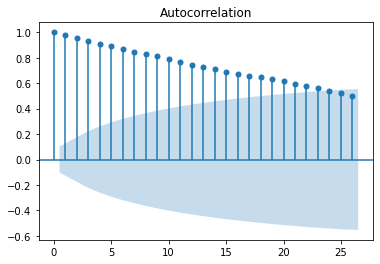

In [11]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data.Close)
plt.show()

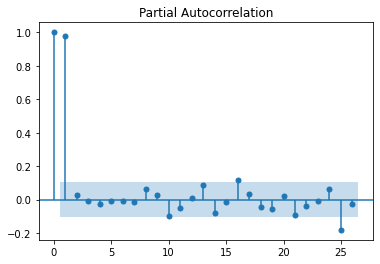

In [12]:
plot_pacf(data.Close)
plt.show()

In [13]:
data['diff'] = data['Close'].diff()

In [14]:
data.head(2)

,Date,Close,diff
Date,,,
2021-02-04,2021-02-04,36926.066406,NaN
2021-02-05,2021-02-05,38144.308594,1218.242188


In [15]:
data = data.drop(data.index[0])
data.head()

,Date,Close,diff
Date,,,
2021-02-05,2021-02-05,38144.308594,1218.242188
2021-02-06,2021-02-06,39266.011719,1121.703125
2021-02-07,2021-02-07,38903.441406,-362.570313
2021-02-08,2021-02-08,46196.464844,7293.023438
2021-02-09,2021-02-09,46481.105469,284.640625


In [16]:
from statsmodels.tsa.arima_model import ARMA
model_AR = ARMA(data['diff'], order=(1,0))
result_AR = model_AR.fit()
result_AR.summary()

C:\Users\ouykh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ouykh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   diff   No. Observations:                  365
Model:                     ARMA(1, 0)   Log Likelihood               -3265.410
Method:                       css-mle   S.D. of innovations           1858.242
Date:                Sun, 06 Feb 2022   AIC                           6536.819
Time:                        16:20:42   BIC                           6548.519
Sample:                    02-05-2021   HQIC                          6541.469
                         - 02-04-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4565     92.701      0.102      0.919    -172.233     191.146
ar.L1.diff    -0.0494      0.052     -0.941      0.347      -0.152       0.053
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -20.2451           +0.0000j           20.2451            0.5000
-----------------------------------------------------------------------------
"""

In [17]:
model_AR2 = ARMA(data['diff'], order=(5,0))
result_AR2 = model_AR.fit()
result_AR2.summary()

C:\Users\ouykh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ouykh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   diff   No. Observations:                  365
Model:                     ARMA(1, 0)   Log Likelihood               -3265.410
Method:                       css-mle   S.D. of innovations           1858.242
Date:                Sun, 06 Feb 2022   AIC                           6536.819
Time:                        16:20:48   BIC                           6548.519
Sample:                    02-05-2021   HQIC                          6541.469
                         - 02-04-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4565     92.701      0.102      0.919    -172.233     191.146
ar.L1.diff    -0.0494      0.052     -0.941      0.347      -0.152       0.053
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -20.2451           +0.0000j           20.2451            0.5000
-----------------------------------------------------------------------------
"""

In [18]:
model_MA = ARMA(data['diff'], order=(0,1))
result_MA = model_MA.fit()
result_MA.summary()

C:\Users\ouykh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ouykh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   diff   No. Observations:                  365
Model:                     ARMA(0, 1)   Log Likelihood               -3265.417
Method:                       css-mle   S.D. of innovations           1858.280
Date:                Sun, 06 Feb 2022   AIC                           6536.834
Time:                        16:20:51   BIC                           6548.534
Sample:                    02-05-2021   HQIC                          6541.484
                         - 02-04-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0456     92.563      0.109      0.914    -171.375     191.466
ma.L1.diff    -0.0485      0.052     -0.936      0.349      -0.150       0.053
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           20.6102           +0.0000j           20.6102            0.0000
-----------------------------------------------------------------------------
"""

In [19]:
model_MA2 = ARMA(data['diff'], order=(0,5))
result_MA2 = model_MA2.fit()
result_MA2.summary()

C:\Users\ouykh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ouykh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   diff   No. Observations:                  365
Model:                     ARMA(0, 5)   Log Likelihood               -3264.540
Method:                       css-mle   S.D. of innovations           1853.759
Date:                Sun, 06 Feb 2022   AIC                           6543.079
Time:                        16:20:53   BIC                           6570.379
Sample:                    02-05-2021   HQIC                          6553.929
                         - 02-04-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0456    101.664      0.099      0.921    -189.212     209.303
ma.L1.diff    -0.0510      0.053     -0.968      0.333      -0.154       0.052
ma.L2.diff     0.0110      0.053      0.209      0.834      -0.092       0.115
ma.L3.diff     0.0328      0.054      0.605      0.545      -0.073       0.139
ma.L4.diff     0.0671      0.055      1.212      0.226      -0.041       0.176
ma.L5.diff    -0.0116      0.053     -0.218      0.827      -0.116       0.093
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4584           -1.2855j            1.9441           -0.3850
MA.2           -1.4584           +1.2855j            1.9441            0.3850
MA.3            1.2029           -1.4756j            1.9038           -0.1411
MA.4            1.2029           +1.4756j            1.9038            0.1411
MA.5            6.2879           -0.0000j            6.2879           -0.0000
-----------------------------------------------------------------------------
"""

In [20]:
model_ARMA = ARMA(data['diff'], order=(5,5))
result_ARMA = model_ARMA.fit()
result_ARMA.summary()

C:\Users\ouykh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ouykh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   diff   No. Observations:                  365
Model:                     ARMA(5, 5)   Log Likelihood               -3262.139
Method:                       css-mle   S.D. of innovations           1832.815
Date:                Sun, 06 Feb 2022   AIC                           6548.278
Time:                        16:21:03   BIC                           6595.076
Sample:                    02-05-2021   HQIC                          6566.876
                         - 02-04-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7683     39.507      0.121      0.904     -72.663      82.200
ar.L1.diff     0.3727      0.186      2.002      0.045       0.008       0.738
ar.L2.diff    -0.0564      0.159     -0.356      0.722      -0.367       0.255
ar.L3.diff     0.3304      0.128      2.575      0.010       0.079       0.582
ar.L4.diff    -0.4522      0.166     -2.725      0.006      -0.778      -0.127
ar.L5.diff     0.7572      0.170      4.458      0.000       0.424       1.090
ma.L1.diff    -0.4345      0.167     -2.598      0.009      -0.762      -0.107
ma.L2.diff     0.0583      0.139      0.420      0.675      -0.214       0.330
ma.L3.diff    -0.2928      0.118     -2.488      0.013      -0.523      -0.062
ma.L4.diff     0.5038      0.148      3.395      0.001       0.213       0.795
ma.L5.diff    -0.8347      0.156     -5.355      0.000      -1.140      -0.529
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7127           -0.7138j            1.0087           -0.3749
AR.2           -0.7127           +0.7138j            1.0087            0.3749
AR.3            1.0146           -0.0000j            1.0146           -0.0000
AR.4            0.5041           -1.0125j            1.1311           -0.1765
AR.5            0.5041           +1.0125j            1.1311            0.1765
MA.1           -0.7095           -0.7048j            1.0000           -0.3755
MA.2           -0.7095           +0.7048j            1.0000            0.3755
MA.3            1.0000           -0.0000j            1.0000           -0.0000
MA.4            0.5112           -0.9678j            1.0945           -0.1727
MA.5            0.5112           +0.9678j            1.0945            0.1727
-----------------------------------------------------------------------------
"""

In [21]:
len(data)

365

In [22]:
data_train = data['diff'][:290]
data_test = data ['diff'][290:]

In [23]:
print(len(data_train))
print(len(data_test))

290
75


In [24]:
data.tail()

,Date,Close,diff
Date,,,
2022-01-31,2022-01-31,38483.125000,565.523437
2022-02-01,2022-02-01,38743.273438,260.148438
2022-02-02,2022-02-02,36952.984375,-1790.289063
2022-02-03,2022-02-03,37154.601563,201.617188
2022-02-04,2022-02-04,40592.703125,3438.101562


In [25]:
pred_model = result_MA2.predict(start= 365, end= 371)
pred_model

2022-02-05   -212.613809
2022-02-06    -72.678446
2022-02-07    149.449576
2022-02-08    237.507605
2022-02-09    -29.526980
2022-02-10     10.045605
2022-02-11     10.045605
Freq: D, dtype: float64

In [26]:
pred_test = pd.date_range ("2022-01-20", periods = 6 ,freq="D")

In [28]:
def predictions(pred_model):
    result = [data.loc['2022-01-20 00:00:00', 'Close']]
    for x in range (1,6):
        result.append(result[-1]+pred_model[x])
    return result

In [29]:
result = predictions(pred_model)

In [30]:
result

[40680.417969,
 40607.73952263721,
 40757.18909837925,
 40994.696703316324,
 40965.16972325954,
 40975.21532865604]